# LC-MS MS2 pos & neg vs Microbiome

In [ ]:
import pandas as pd
import numpy as np
import os
import biom

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from adjustText import adjust_text

import prince

%matplotlib inline

ModuleNotFoundError: No module named 'adjustText'

In [ ]:
#!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/MicrobiomeMetabolome

#!mkdir SensoryMicrobiomeMetabolome

In [ ]:
# set the directory 
os.chdir('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/MicrobiomeMetabolome')

In [ ]:
group_colors = {
    'Bacteria': '#440154FF',
    'Climate': '#482677FF',
    'Fungi': '#3F4788FF',
    'GCMS': '#32648EFF',
    'LCMS_Neg': '#238A8DFF',
    'LCMS_Pos': '#20A386FF',
    'Plots': '#56C667FF',
    'Sensory': '#B8DE29FF',
    'Wine Chemistry': '#FDE725FF'
}


# Load and Merge all data

### 1. Microbiome data 

In [ ]:
df_ITS = pd.read_csv('ITS/PostMLF_cOTUs_rarefied_labled.tsv', sep='\t', index_col=0)
df_ITS_2021 = df_ITS[df_ITS['index'].str.contains(r'_2021_', regex=True)]

df_ITS_2021.shape

(12, 89)

note - we loose 4 samples because 16S is so shallow (consider removing?)

In [ ]:
df_16S = pd.read_csv('16S/PostMLF_cOTUs_rarefied_labled.tsv', sep='\t', index_col=0)
df_16S_2021 = df_16S[df_16S['index'].str.contains(r'_2021_', regex=True)]

df_16S_2021.shape

(8, 93)

### 2. Metabolites

In [ ]:
df_wMetadata_cleaned_collapsed = pd.read_csv('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/Pos_MS2_OutlierRemoved.csv', index_col=0)
postMLF_df_Pos = df_wMetadata_cleaned_collapsed[
    (df_wMetadata_cleaned_collapsed['sample_type'] == 'PostMLF') &  
    (df_wMetadata_cleaned_collapsed['year'] == 2021)
    ].reset_index()

postMLF_df_Pos.head()

,Sample Name,sample_type,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",...,Val-Leu.1,Val-Ser,Val-Val,Valylproline,VLK,VLK.1,Xanthine,YLK,α-Aspartylphenylalanine,α-Aspartylphenylalanine.1
0,PostMLF_2021_Plot14,PostMLF,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,...,-0.536372,0.385700,0.676601,1.027760,-0.996595,-0.872509,0.579090,-0.950161,-1.082261,0.957138
1,PostMLF_2021_Plot9,PostMLF,2021,Plot9,-0.501003,-0.526062,-0.347909,-0.485291,-0.634820,0.321202,...,0.330408,0.537018,1.235462,0.759026,-0.246094,-1.025138,0.582293,-0.891719,-0.956203,0.443724
2,PostMLF_2021_Plot15,PostMLF,2021,Plot15,-0.502183,-0.464256,-0.531862,-0.438669,-0.606908,0.887332,...,-0.395170,0.439907,0.638677,0.554660,0.061881,-1.169451,0.504978,-0.978633,-1.430715,0.214635
3,PostMLF_2021_Plot17,PostMLF,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,...,1.242002,0.756870,0.213115,0.899945,-1.216365,-1.243514,0.341372,-1.050119,1.237547,0.882181
4,PostMLF_2021_Plot13,PostMLF,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,...,0.698611,0.554813,1.390592,0.447771,0.222380,0.111434,0.397684,-1.270905,1.558400,2.052771


In [ ]:
df_wMetadata_cleaned_collapsed = pd.read_csv('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/Neg_MS2_OutlierRemoved.csv', index_col=0)
postMLF_df_Neg = df_wMetadata_cleaned_collapsed[
    (df_wMetadata_cleaned_collapsed['sample_type'] == 'PostMLF') &  
    (df_wMetadata_cleaned_collapsed['year'] == 2021)
    ].reset_index()

postMLF_df_Neg.head()

,Sample Name,sample_type,year,plot,L-(+)-Tartaric acid,Citric acid,2-Isopropylmalic acid,Citric acid.1,D-α-Hydroxyglutaric acid,D-α-Hydroxyglutaric acid.1,...,Linoleic Acid,Cer-AP t40:1,NP-008309,"N-(1-Amino-1-oxo-2-propanyl)-3-[(cyclohexylcarbamoyl)amino]-1,4,5-trihydroxycyclohexanecarboxamide","Trichothec-9-ene-3-α,4-β,8-α,15-tetrol, 12,13-epoxy-",NP-001596.1,Quercetin.1,"3-Hydroxy-3,5,5-trimethyl-4-(3-oxo-1-buten-1-ylidene)cyclohexyl β-D-glucopyranoside","3,4-Bis(3-Methoxyanilino)cyclobut-3-ene-1,2-dione",L(-)-Fucose
0,PostMLF_2021_Plot14,PostMLF,2021,Plot14,0.038245,0.666472,0.415990,0.585482,0.437534,0.356557,...,-0.394106,-0.517996,0.111880,0.416383,-1.854889,0.359054,0.581218,-0.225192,-0.572144,-0.518829
1,PostMLF_2021_Plot9,PostMLF,2021,Plot9,0.017826,0.814257,0.453126,0.620211,0.375510,0.140205,...,-0.480073,-0.672585,0.356217,0.681094,-0.885018,0.738196,-0.549347,-0.220072,-0.583733,0.015209
2,PostMLF_2021_Plot15,PostMLF,2021,Plot15,0.307661,0.851969,0.418111,0.645449,0.428479,0.267467,...,-0.526612,-0.591900,-0.301650,0.256553,0.983983,0.892596,-1.062247,-0.870552,-0.426984,0.887012
3,PostMLF_2021_Plot17,PostMLF,2021,Plot17,-0.078863,0.712910,0.569052,0.642096,0.447982,0.964195,...,-0.595754,-0.743876,-0.421367,0.301115,-1.886399,0.657240,0.134737,0.045850,-0.602861,0.479041
4,PostMLF_2021_Plot13,PostMLF,2021,Plot13,-0.169876,0.747154,0.621012,0.607945,0.494572,0.282541,...,0.566443,-0.910162,0.328608,1.272440,-2.011972,1.223662,-1.837093,-1.114498,-0.578826,-1.005457


In [ ]:
postMLF_df_all = pd.merge(postMLF_df_Pos, postMLF_df_Neg, on=('Sample Name', 'sample_type', 'year', 'plot'), how='outer')
postMLF_df_all.shape

(11, 365)

### 3. Climate, Plot MD and Wine Chemistry

In [ ]:
# CHEMISTRY
md = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/Raw-MD_Vineyard_MV_data.csv')
md["Plot_str"] = "Plot" + md["Plot"].astype(str)
md_wine_chemistry = md[['Plot_str', 'Year', 'Must_Oechsle', 'Wine_Tartatic_Acid', 
                        'Wine_Malic_Acid', 'Wine_Glucose', 'Wine_Fructose', 
                        'Wine_Lactic_Acid', 'Wien_Glycerol', 'Wine_Acetic_Acid']]

df_merged_1 = postMLF_df_all.merge(md_wine_chemistry, left_on=["plot", "year"], right_on=["Plot_str", "Year"], how="inner")
df_merged_1 = df_merged_1.drop(columns=['Plot_str', 'Year', 'sample_type']).dropna()

df_merged_1.head()

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,"3,4-Bis(3-Methoxyanilino)cyclobut-3-ene-1,2-dione",L(-)-Fucose,Must_Oechsle,Wine_Tartatic_Acid,Wine_Malic_Acid,Wine_Glucose,Wine_Fructose,Wine_Lactic_Acid,Wien_Glycerol,Wine_Acetic_Acid
0,PostMLF_2021_Plot11,2021,Plot11,-0.585963,-0.474270,-0.532204,-0.538732,-0.766243,0.481209,-0.652926,...,-0.715982,0.228518,75.0,3.42,0.06,0.33,0.30,1.87,7.13,1.03
1,PostMLF_2021_Plot13,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,-0.578826,-1.005457,75.0,2.61,0.09,0.33,0.28,1.53,7.13,0.68
2,PostMLF_2021_Plot14,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,-0.572144,-0.518829,78.0,3.06,0.06,0.34,0.29,1.47,6.90,0.77
3,PostMLF_2021_Plot15,2021,Plot15,-0.502183,-0.464256,-0.531862,-0.438669,-0.606908,0.887332,-0.452500,...,-0.426984,0.887012,73.0,3.43,0.07,0.33,0.30,1.69,6.29,0.75
4,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,-0.602861,0.479041,73.0,3.06,0.15,0.42,0.29,1.79,7.24,0.81


In [2]:
# PLOTS
md_plots = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux_plots.csv')
md_plots["Plot_str"] = "Plot" + md_plots["Plot"].astype(str)
md_plots_subset =  md_plots[['Plot_str', 'Altitude', 'Average_slope', 'Exposition', 'Average_radiation', 'Geology', 'Hydromorphie_code']]
# Convert categorical columns to dummy variables
categorical_cols = ['Exposition', 'Geology']
md_plots_subset_dummies = pd.get_dummies(md_plots_subset, columns=categorical_cols, drop_first=True)
# Convert boolean columns to integers (0 or 1)
boolean_columns = md_plots_subset_dummies.select_dtypes(include='bool').columns
md_plots_subset_dummies[boolean_columns] = md_plots_subset_dummies[boolean_columns].astype(int)

df_merged_2 = df_merged_1.merge(md_plots_subset_dummies, left_on=["plot"], right_on=["Plot_str"], how="inner")
df_merged_2 = df_merged_2.drop(columns=['Plot_str']).dropna()

df_merged_2.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux_plots.csv'

In [12]:
# CLIMATE
md_climate = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux-Climate.csv', index_col=0)
# Remove underscores from the 'Plot' column
md_climate['Plot'] = md_climate['Plot'].str.replace('_', '', regex=False)
# include more climate data 
#md_climate_subset = md_climate[['Plot', 'Year', 'cv_rh', 'average_rh', 'cv_temperature', 'accumulated_temperature', 'average_temperature']]
# minimum 
md_climate_subset = md_climate[['Plot', 'Year',  'average_rh','average_temperature']]

df_merged_3 = df_merged_2.merge(md_climate_subset, left_on=["plot", "year"], right_on=["Plot", "Year"], how="inner")
df_merged_3 = df_merged_3.drop(columns=['Plot', 'Year']).dropna()

df_merged_3.head()

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,Altitude,Average_slope,Average_radiation,Hydromorphie_code,Exposition_South-West,Geology_Colluvium,Geology_Gravel_moraine,Geology_Molasse,average_rh,average_temperature
0,PostMLF_2021_Plot11,2021,Plot11,-0.585963,-0.474270,-0.532204,-0.538732,-0.766243,0.481209,-0.652926,...,490,20,937.5,1,0,0,1,0,71.948958,17.964399
1,PostMLF_2021_Plot13,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,580,30,937.5,1,1,0,0,1,71.334895,17.544612
2,PostMLF_2021_Plot14,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,440,25,912.5,1,0,0,0,0,70.767447,18.343627
3,PostMLF_2021_Plot15,2021,Plot15,-0.502183,-0.464256,-0.531862,-0.438669,-0.606908,0.887332,-0.452500,...,520,30,912.5,0,1,0,1,0,72.104023,17.892713
4,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,390,20,912.5,1,1,0,0,1,72.076768,18.476535


In [13]:
## add microbiome 
df_merged_4 = df_merged_3.merge(df_ITS, left_on=["Sample Name"], right_on=["index"], how="inner")
df_merged_4 = df_merged_4.drop(columns=['index']).dropna()

df_merged_5 = df_merged_4.merge(df_16S, left_on=["Sample Name"], right_on=["index"], how="inner")
df_merged_5 = df_merged_5.drop(columns=['index']).dropna()

df_merged_5

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,s__Mycobacterium_sp.,f__Pirellulaceae.1,s__Ruminiclostridium_hungatei,g__TK10.3,g__Vicinamibacteraceae.3,g__A4b,o__Gaiellales.2,g__Pirellula.4,s__Salmonella_enterica,g__Vicinamibacteraceae.4
0,PostMLF_2021_Plot11,2021,Plot11,-0.585963,-0.474270,-0.532204,-0.538732,-0.766243,0.481209,-0.652926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PostMLF_2021_Plot13,2021,Plot13,-0.653453,-0.508855,-0.621821,-0.575688,-0.856514,0.761038,-0.681777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,PostMLF_2021_Plot14,2021,Plot14,-0.412632,-0.527166,-0.546934,-0.359954,-0.550805,0.658860,-0.301487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PostMLF_2021_Plot19,2021,Plot19,-0.518364,-0.397765,-0.432828,-0.504701,-1.485374,0.543542,-0.506653,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
5,PostMLF_2021_Plot20,2021,Plot20,-0.533360,-0.375282,-0.259098,-0.557572,-0.541692,0.914088,-0.495941,...,0.0,2.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
6,PostMLF_2021_Plot4,2021,Plot4,-0.602334,-0.490813,-0.605077,-0.646417,-0.651491,0.128403,-0.495411,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,PostMLF_2021_Plot5,2021,Plot5,-0.468879,-0.385064,-0.413230,-0.462279,-0.418444,0.775219,-0.477522,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# add GC-MS 

GCMS_df = pd.read_csv('/home/lfloerl/cloud/lfloerl/Microterroir/GC-MS_data/Artifacts/GC-2021-forCorrelation.csv', index_col=0)
GCMS_df['Sample Name'] = str('PostMLF_') + GCMS_df['Name']
GCMS_df.drop(columns=('Name'), inplace=True)

df_merged_6 = df_merged_5.merge(GCMS_df, left_on=["Sample Name"], right_on=["Sample Name"], how="inner")

df_merged_6.tail()

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,Phenethyl alcohol,"Propanoic acid, 2-hydroxy-, ethyl ester, (S)-","Propanoic acid, 2-methyl-",Tetradecane,"Undecanoic acid, ethyl ester",VARAMOL 106 YLBICYCLO[2HYLENE]R]ETHYLPHENYL ESTER]],trans-Geranylacetone,trans-Nerolidol,ß-Citronellol,ß-Damascenone
3,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,0.122985,0.013668,0.002177,0.002459,0.000000,0.0,0.0,0.0,0.000000,0.0
4,PostMLF_2021_Plot19,2021,Plot19,-0.518364,-0.397765,-0.432828,-0.504701,-1.485374,0.543542,-0.506653,...,0.138099,0.026112,0.006993,0.003695,0.000000,0.0,0.0,0.0,0.000000,0.0
5,PostMLF_2021_Plot20,2021,Plot20,-0.533360,-0.375282,-0.259098,-0.557572,-0.541692,0.914088,-0.495941,...,0.210333,0.015053,0.005426,0.005252,0.000285,0.0,0.0,0.0,0.000617,0.0
6,PostMLF_2021_Plot4,2021,Plot4,-0.602334,-0.490813,-0.605077,-0.646417,-0.651491,0.128403,-0.495411,...,0.161416,0.016864,0.000000,0.002965,0.000418,0.0,0.0,0.0,0.000000,0.0
7,PostMLF_2021_Plot5,2021,Plot5,-0.468879,-0.385064,-0.413230,-0.462279,-0.418444,0.775219,-0.477522,...,0.177182,0.018668,0.000000,0.002121,0.000372,0.0,0.0,0.0,0.000510,0.0


In [15]:
# add sensory 

sensory_df = pd.read_csv('/home/lfloerl/cloud/lfloerl/Microterroir/Sensory_data/Sensory_data_median_renamed.csv', index_col=0)
sensory_df['Sample Name'] = str('PostMLF_') + sensory_df['Sample']
# note, 2021 samples! 
sensory_df['Sample Name'] = sensory_df['Sample Name'].str.replace('2022', '2021', regex=False)
sensory_df.drop(columns=('Sample'), inplace=True)

# merge!
df_merged_all = df_merged_6.merge(sensory_df, left_on=["Sample Name"], right_on=["Sample Name"], how="inner")

df_merged_all.tail()

,Sample Name,year,plot,"1,2-Di-(9Z,12Z,15Z-octadecatrienoyl)-sn-glycero-3-phosphocholine","1,2-Dilinoleoyl-sn-glycero-3-phosphocholine","1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine","1,5-Naphthalenediamine","1,6-ANHYDRO-B-GLUCOSE","1-(3,4-dimethoxyphenyl)ethan-1-one oxime",1-Palmitoyl-sn-glycero-3-phosphocholine,...,Olfactory_complexity,CO2,Acidity,Bitterness,Sweetness,Volume_in_the_mouth,Balance,Alcohol,Freshness_on_the_palate,Aromatic_length
2,PostMLF_2021_Plot17,2021,Plot17,-0.590367,-0.503435,-0.598670,-0.443338,-0.699624,0.793923,-0.430528,...,3.240,0.790,5.245,2.050,2.775,3.425,2.22,2.095,2.515,5.155
3,PostMLF_2021_Plot19,2021,Plot19,-0.518364,-0.397765,-0.432828,-0.504701,-1.485374,0.543542,-0.506653,...,2.955,0.060,4.340,1.995,0.880,1.890,2.30,1.320,3.355,3.635
4,PostMLF_2021_Plot20,2021,Plot20,-0.533360,-0.375282,-0.259098,-0.557572,-0.541692,0.914088,-0.495941,...,4.550,0.130,4.440,1.830,0.930,2.030,2.58,0.900,3.330,4.170
5,PostMLF_2021_Plot4,2021,Plot4,-0.602334,-0.490813,-0.605077,-0.646417,-0.651491,0.128403,-0.495411,...,3.130,0.145,4.475,3.425,1.050,1.865,2.80,1.770,3.165,4.655
6,PostMLF_2021_Plot5,2021,Plot5,-0.468879,-0.385064,-0.413230,-0.462279,-0.418444,0.775219,-0.477522,...,3.315,0.130,4.775,3.020,3.830,3.050,1.34,2.200,2.700,5.060


In [16]:
# Keep track of the columns' origins
Fun_columns = df_ITS.iloc[:, 1:].columns.tolist()
Bac_columns = df_16S.iloc[:, 1:].columns.tolist()
LCMS_Neg_columns = postMLF_df_Neg.iloc[:, 4:].columns.tolist()
LCMS_Pos_columns = postMLF_df_Pos.iloc[:, 4:].columns.tolist()
wine_chemistry_columns = md_wine_chemistry.iloc[:, 2:].columns.tolist()
plots_columns = md_plots_subset_dummies.iloc[:, 1:].columns.tolist()
climate_columns = md_climate_subset.iloc[:, 2:].columns.tolist()
GCMS_columns = GCMS_df.iloc[:, :-1].columns.tolist()
Sensory_columns = sensory_df.iloc[:, :-1].columns.tolist()
metadata_columns = ['Sample Name', 'year', 'plot']

In [17]:
# Create a multi-index column structure
multi_index_columns = (
    [('LCMS_Pos', col) for col in LCMS_Pos_columns] +
    [('LCMS_Neg', col) for col in LCMS_Neg_columns] +
    [('Wine Chemistry', col) for col in wine_chemistry_columns] +
    [('Plots', col) for col in plots_columns] +
    [('Climate', col) for col in climate_columns] +
    [('Fungi', col) for col in Fun_columns] +
    [('Bacteria', col) for col in Bac_columns] +
    [('GCMS', col) for col in GCMS_columns] +
    [('Sensory', col) for col in Sensory_columns] )

# Subset data and assign multi-index
df_metadata = df_merged_all[metadata_columns]  # Keep metadata separately
df_mfa = df_merged_all.drop(columns=metadata_columns)  # Drop metadata
df_mfa.columns = pd.MultiIndex.from_tuples(multi_index_columns)  # Assign multi-index
df_mfa = df_mfa.astype("float64")

# Extract the group names (first level of multi-index)
groups = df_mfa.columns.levels[0].tolist()

df_mfa.shape

(7, 731)

In [18]:
# drop columns with zero variance 
zero_var_cols = df_mfa.std() == 0
df_mfa = df_mfa.loc[:, ~zero_var_cols]

df_mfa.shape

(7, 606)

In [19]:
# Check if there are any NaN values in df_mfa
nan_cells = df_mfa.isna().sum().sum()
print(f"Total NaN cells in df_mfa: {nan_cells}")

Total NaN cells in df_mfa: 0


In [20]:
df_mfa.to_csv('SensoryMicrobiomeMetabolome/MFA_table.csv')

# MFA 

## How many Components?

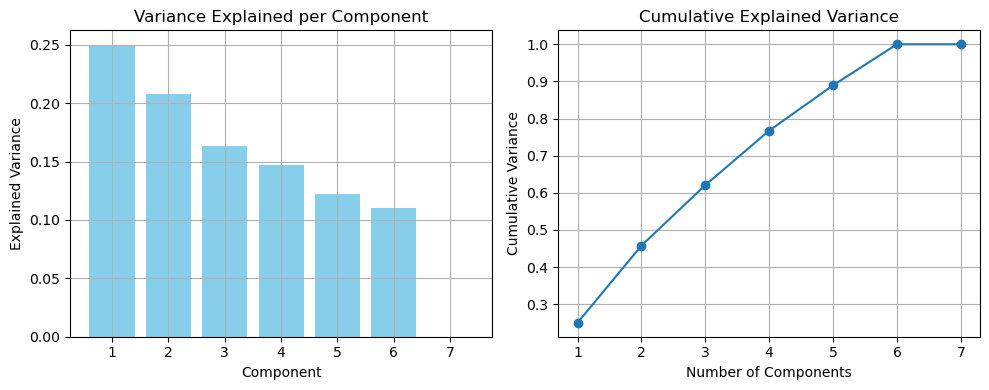

In [21]:
# Define the number of components to test
n_components = 7

# Define MFA and fit the model
mfa = prince.MFA(
    n_components=n_components,  
    n_iter=3, 
    copy=True,
    check_input=True,
    random_state=42)

# Fit MFA to the data (excluding metadata columns)
mfa = mfa.fit(
    df_mfa,
    groups=groups,
    supplementary_groups=None)

# Get explained variance per component
explained_variance_ratio = mfa.eigenvalues_ / np.sum(mfa.eigenvalues_)

# Create subplots for explained variance and cumulative variance plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot for variance explained per component
axes[0].bar(range(1, n_components + 1), explained_variance_ratio[:n_components], color='skyblue')
axes[0].set_title('Variance Explained per Component')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True)

# Line plot for cumulative explained variance (elbow plot)
axes[1].plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio[:n_components]), marker='o', linestyle='-')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].set_xticks(range(1, n_components + 1))
axes[1].grid(True)

# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()

In [22]:
# Initialize MFA model
mfa = prince.MFA(
    n_components=4,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit MFA with multi-index groups
mfa = mfa.fit(
    df_mfa,
    groups=groups,
    supplementary_groups=None)

mfa_results = mfa.transform(df_mfa)
# Merge MFA results with metadata to retain 'year' information
mfa_results = mfa_results.merge(df_metadata, left_index=True, right_index=True)

mfa.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,6.074,25.00%,25.00%
1,5.046,20.77%,45.76%
2,3.962,16.30%,62.07%
3,3.566,14.67%,76.74%


### Contributions

/scratch/lfloerl/tmpdata/ipykernel_2871219/836130026.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Group', y='Sum of Contributions', data=df_plot, palette=group_colors)


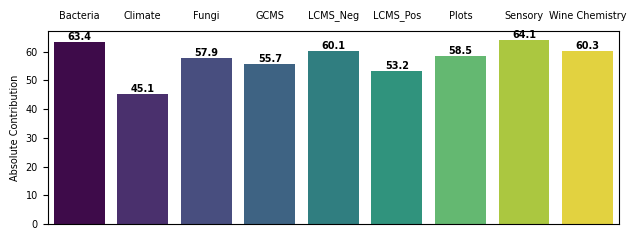

In [23]:
partial_coords = mfa.partial_row_coordinates(df_mfa)

# Assuming `partial_coords` is the dataframe you obtained from MFA
df_abs_sum = partial_coords.abs().sum()

# Convert to DataFrame for plotting
df_plot = df_abs_sum.groupby(level=0).sum().reset_index()
df_plot.columns = ['Group', 'Sum of Contributions']

# Plot
plt.figure(figsize=(6.5, 2.5))
ax = sns.barplot(x='Group', y='Sum of Contributions', data=df_plot, palette=group_colors)
# Add numeric values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=7, fontweight='bold')
ax.tick_params(axis='both', labelsize=7)

# Move x-axis labels to the top
ax.xaxis.set_label_position('top')
ax.xaxis.set_tick_params(labeltop=True)  # Make sure the labels appear on top

# Remove x-ticks at the bottom
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

#plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Absolute Contribution', fontsize=7)
plt.tight_layout()

plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/MFA_PostMLF21_AbsoluteContributions.png', dpi=1000)

plt.show()

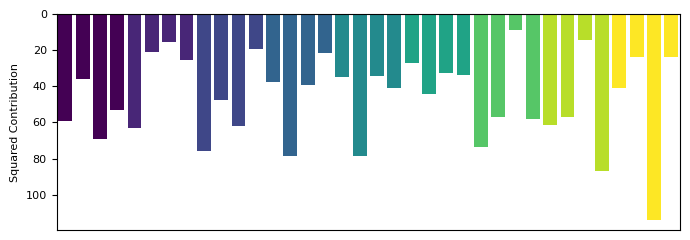

In [25]:
dim_contributions = partial_coords.groupby(level=0).agg(lambda x: np.sum(x**2))

# 1. Sum the columns for each group
group_sums = dim_contributions.sum(axis=0)
# 2. Convert the Series to a DataFrame (optional, for inspection)
group_sums_df = group_sums.to_frame(name='Sum of Column Values')
# 3. Extract the first element of the multiindex for x-axis labels
x_labels = [label[0] for label in group_sums_df.index]
# Reset the multiindex
group_sums_df = group_sums_df.reset_index()
# Rename the columns
group_sums_df.columns = ['group', 'dimension', 'Sum of Column Values']
# make new col
group_sums_df['group_dim'] = group_sums_df['group'] + '_' + group_sums_df['dimension'].astype(str)
# Map group names to colors
group_sums_df['color'] = group_sums_df['group'].map(group_colors)


# PLOT 
fig, ax = plt.subplots(figsize=(7,2.5))
ax.bar(group_sums_df['group_dim'], group_sums_df['Sum of Column Values'], color=group_sums_df['color'])

# Invert the y-axis
ax.invert_yaxis()

# Labels & title
plt.title('')
plt.xlabel('')
ax.set_xticklabels([])
plt.ylabel('Squared Contribution', fontsize=8)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='both', labelsize=8)


# Tight layout
plt.tight_layout()

# Adjust x-axis limits to remove white space
ax.set_xlim(-0.5, len(group_sums_df) - 0.5)

# Save 
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/MFA_PostMLF21_ContributionsPerDimension.png',  dpi=1000)  

plt.show()

<hr>


### group representation

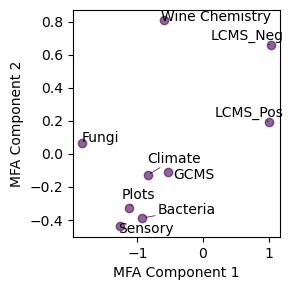

In [ ]:
# get the coordinates per group 
group_rep_df =  mfa.partial_row_coordinates(df_mfa)
group_rep_df_ave = pd.DataFrame(group_rep_df.median())
group_rep_df_ave.reset_index(inplace=True)
# Rename the columns
group_rep_df_ave.columns = ['group', 'subgroup', 'value']
# Filter for only subgroups 0 and 1
group_rep_df_ave = group_rep_df_ave[group_rep_df_ave['subgroup'].isin([0, 1])]
# Pivot the DataFrame to get the desired structure
group_rep_df_ave_PC12 = group_rep_df_ave.pivot(index='group', columns='subgroup', values='value')
# Rename the columns to PC1 and PC2
group_rep_df_ave_PC12.columns = ['PC1', 'PC2']
# Reset the index to make 'group' a column
group_rep_df_ave_PC12 = group_rep_df_ave_PC12.reset_index()

# Plot
plt.figure(figsize=(3, 3))
plt.scatter(group_rep_df_ave_PC12['PC1'], group_rep_df_ave_PC12['PC2'], color='#440154FF', alpha=0.6)

# Create a list to store the text objects
texts = []

# Add labels for each group
for group_name, (x, y) in zip(group_rep_df_ave_PC12['group'], zip(group_rep_df_ave_PC12['PC1'], group_rep_df_ave_PC12['PC2'])):
    texts.append(plt.text(x, y, str(group_name), fontsize=10))

plt.xlabel("MFA Component 1")
plt.ylabel("MFA Component 2")

# Adjust the text positions to avoid overlaps and stay within the figure
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#440154FF', lw=0.5))

plt.tight_layout()
plt.show()

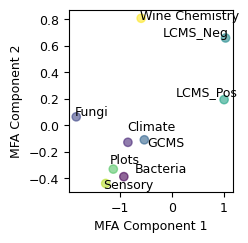

In [56]:
# Map each group to its color using the group_colors dictionary
group_rep_df_ave_PC12['color'] = group_rep_df_ave_PC12['group'].map(group_colors)

# Plot
plt.figure(figsize=(2.5, 2.5))
plt.rcParams.update({'font.size': 9})

# Use the colors from the 'color' column
plt.scatter(group_rep_df_ave_PC12['PC1'], group_rep_df_ave_PC12['PC2'],
            color=group_rep_df_ave_PC12['color'], alpha=0.6)

# Create a list to store the text objects
texts = []

# Add labels for each group
for group_name, (x, y) in zip(group_rep_df_ave_PC12['group'], zip(group_rep_df_ave_PC12['PC1'], group_rep_df_ave_PC12['PC2'])):
    texts.append(plt.text(x, y, str(group_name), fontsize=9))

plt.xlabel("MFA Component 1", fontsize=9)
plt.ylabel("MFA Component 2", fontsize=9)

# Adjust the text positions to avoid overlaps and stay within the figure
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#440154FF', lw=0))

plt.tight_layout()
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/MFA_PostMLF21_groupRep.png', dpi=1000)

plt.show()

### Biplots

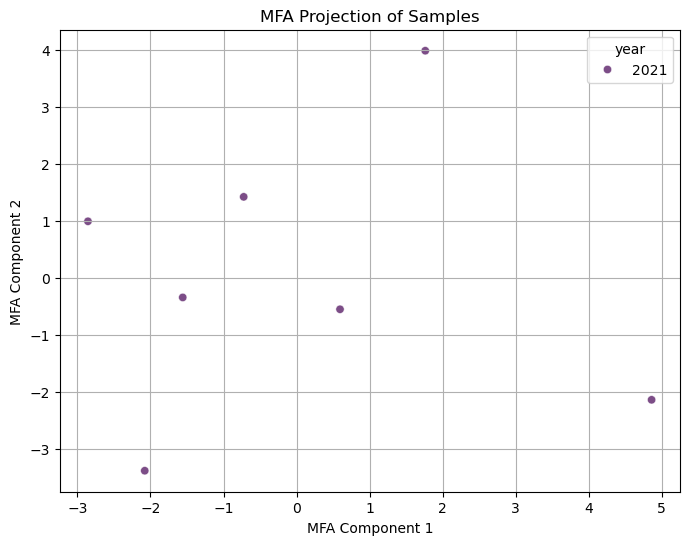

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)
plt.xlabel("MFA Component 1")
plt.ylabel("MFA Component 2")
plt.title("MFA Projection of Samples")
plt.grid()
plt.show()

In [28]:
# Extract coordinates of individuals (rows)
individuals = mfa_results.iloc[:, :2].values  # First 2 components

# Extract variable loadings (correlations with MFA axes)
variable_loadings = mfa.column_correlations.iloc[:, :2]

# Drop the multi-index
variable_loadings_df = variable_loadings.reset_index()

# Rename columns
variable_loadings_df.columns = ["Variable", "MFA Comp 1", "MFA Comp 2"]

# Compute Loadings contribution (sum of squared correlations)
variable_loadings_df["Loadings Contribution"] = ( variable_loadings_df["MFA Comp 1"].abs() + variable_loadings_df["MFA Comp 2"].abs())

# Sort by Loadings contribution in descending order
variable_loadings_df = variable_loadings_df.sort_values(by="Loadings Contribution", ascending=False)

variable_loadings_df["group"] = variable_loadings_df["Variable"].apply(lambda x: x[0])

# Select top 20 based on Loadings Contribution
top_loadings = variable_loadings_df.nlargest(10, "Loadings Contribution")
top_loadings['Variable'] = top_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

top_loadings

,Variable,MFA Comp 1,MFA Comp 2,Loadings Contribution,group
523,'Pro-Phe',0.642565,0.743419,1.385984,LCMS_Pos
362,'NP-020521',0.745053,0.626967,1.372019,LCMS_Neg
187,'Ethyl heptanoate',0.586311,0.783677,1.369988,GCMS
385,'1-Palmitoyl-sn-glycero-3-phosphocholine',-0.555703,-0.802498,1.358201,LCMS_Pos
495,'Palmitoyl ethanolamide',-0.548085,-0.779457,1.327541,LCMS_Pos
501,'PEG n11',-0.579236,-0.740415,1.319652,LCMS_Pos
454,'L-Glutamic acid.1',-0.432813,-0.883735,1.316549,LCMS_Pos
499,'PEG n10',-0.462889,-0.836292,1.299181,LCMS_Pos
577,'Olfactory_intensity',-0.799628,-0.498015,1.297643,Sensory
563,'Valylproline',-0.704302,-0.590765,1.295067,LCMS_Pos


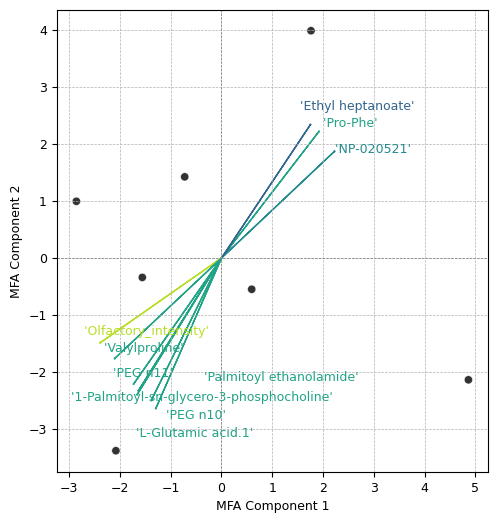

In [58]:
# Biplot
fig, ax = plt.subplots(figsize=(7.5, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], style="year", alpha=0.8, color='black')

# Define a scaling factor to extend the arrows
scaling_factor = 3  

# Create a color map based on the group and intensity (Total Contribution)
norm = plt.Normalize(vmin=top_loadings['Loadings Contribution'].min(), vmax=top_loadings['Loadings Contribution'].max())  
sm = plt.cm.ScalarMappable(cmap='Greys', norm=norm)
sm.set_array([])

## Store text objects for later adjustment
text_objects = []

for i, row in top_loadings.iterrows():
    group_color = group_colors.get(row['group'], 'black')  
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color=group_color, length_includes_head=True)
    
    # Add text label with matching color
    text = ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
                   row["MFA Comp 2"] * (scaling_factor + 0.1), 
                   row["Variable"], fontsize=9, color=group_color)
    text_objects.append(text)

# Adjust label positions to prevent overlap
adjust_text(text_objects, ax=ax, expand_points=(1.3, 1.3), arrowprops=dict(arrowstyle="-", color='gray', lw=0))

# Add first legend for groups (custom patches)
# Create the patches
group_legend_patches = [matplotlib.patches.Patch(color=color, label=group) for group, color in group_colors.items()]
# Create the legend and set the font size
plt.legend(handles=group_legend_patches, fontsize=9)
group_legend = ax.legend(handles=group_legend_patches, title="Groups", loc="upper left", bbox_to_anchor=(1.05, 1))

# Add both legends back to the plot
ax.add_artist(group_legend)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("")

# Adjust margins to make space for the legend
fig.subplots_adjust(right=0.7)  # Increase the right margin to fit the legend

# Show grid
ax.grid(True, linestyle="--", linewidth=0.5)

# Save the figure
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/MFA_PostMLF21.png', dpi=1000)

plt.show()


## Seperate Biplots

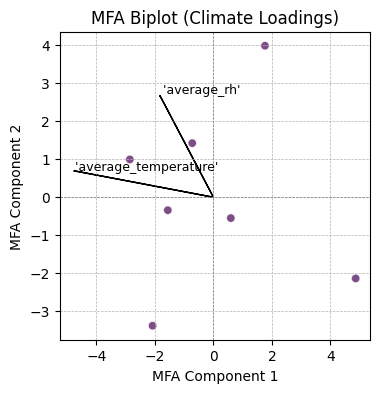

In [72]:
# Select only the "Climate" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Climate"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(4, 4))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", legend=False, palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Climate Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
#ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

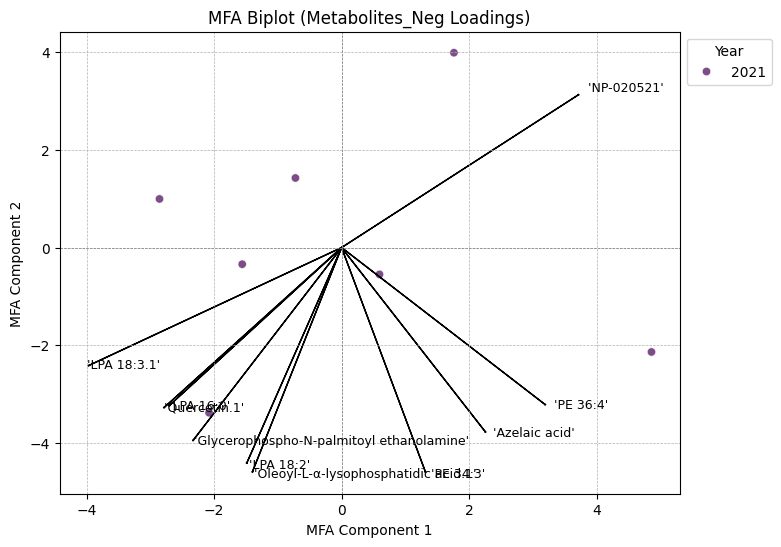

In [35]:
# Select only the 'Metabolites_Neg' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'LCMS_Neg']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Metabolites_Neg Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

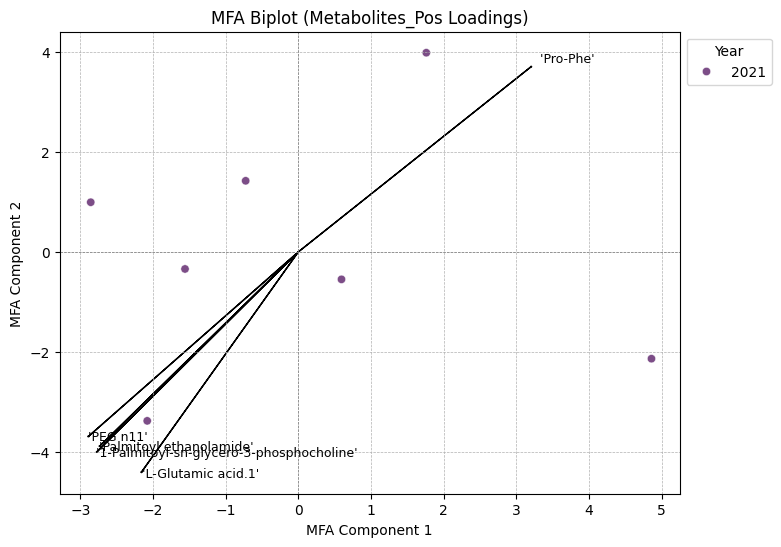

In [36]:
# Select only the 'Metabolites_Pos' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'LCMS_Pos']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(5, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Metabolites_Pos Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

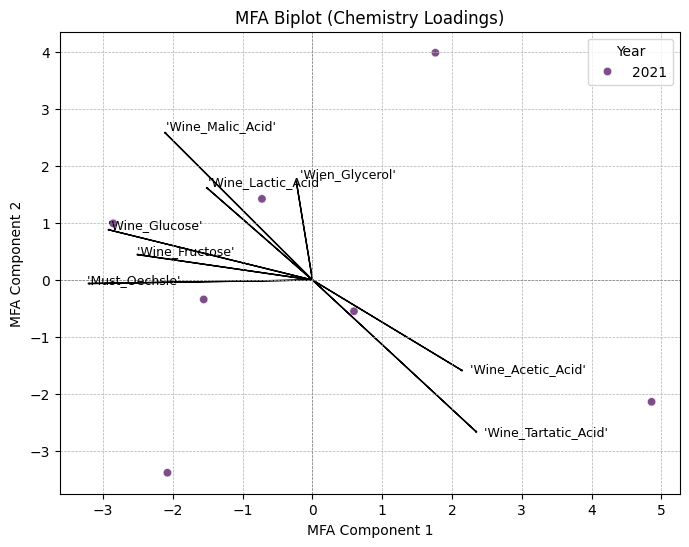

In [37]:
# Select only the 'Wine Chemistry' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'Wine Chemistry']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Chemistry Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

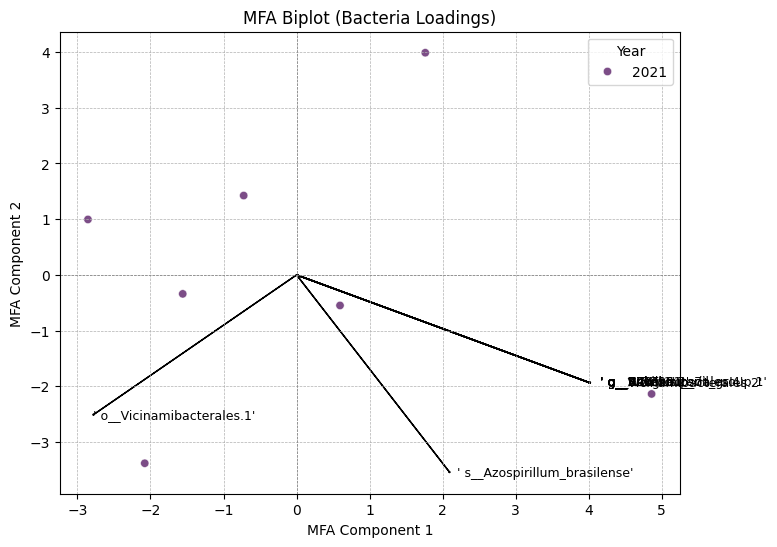

In [38]:
# Select only the "Bacteria" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Bacteria"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Bacteria Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

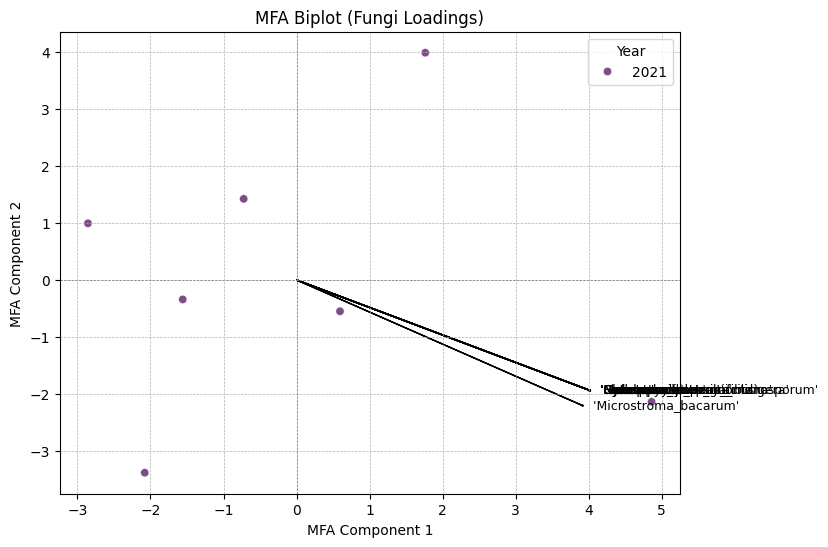

In [39]:
# Select only the "Fungi" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Fungi"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Fungi Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

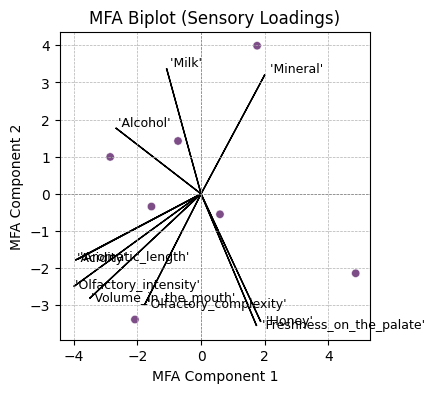

In [74]:
# Select only the "Fungi" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Sensory"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(4, 4))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], legend=False, hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Sensory Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
#ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

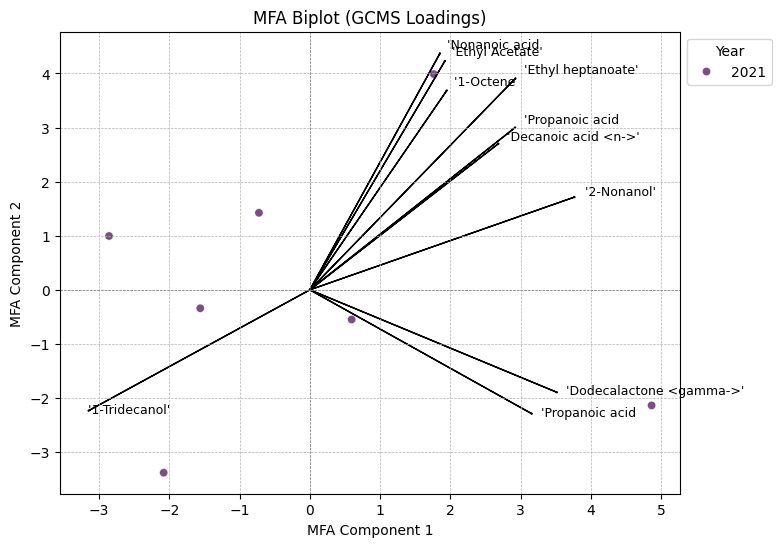

In [41]:
# Select only the "Fungi" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "GCMS"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (GCMS Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

# Which variables correlate? 

In [42]:
# make the clustermap df
clustermap_df = df_merged_all.drop(columns=['year', 'plot']) 
clustermap_df.set_index('Sample Name', inplace=True)

clustermap_df.columns = pd.MultiIndex.from_tuples(multi_index_columns)
clustermap_df = clustermap_df.astype("float64")

# Remove low-variance columns
#clustermap_df_var = clustermap_df.loc[:, clustermap_df.std() > 1e-10] 
clustermap_df_var = clustermap_df.loc[:, clustermap_df.std() > 1e-1] 

# Extract the group names (first level of multi-index)
groups = clustermap_df.columns.levels[0].tolist()

# Extract first level of MultiIndex (group names)
column_groups = clustermap_df_var.columns.get_level_values(0)
# Map group names to their assigned colors
col_colors = column_groups.map(group_colors)

print('Clustermap before: '+ str(clustermap_df.shape))
print('Clustermap remove low variane: '+ str(clustermap_df_var.shape))

Clustermap before: (7, 731)
Clustermap remove low variane: (7, 477)


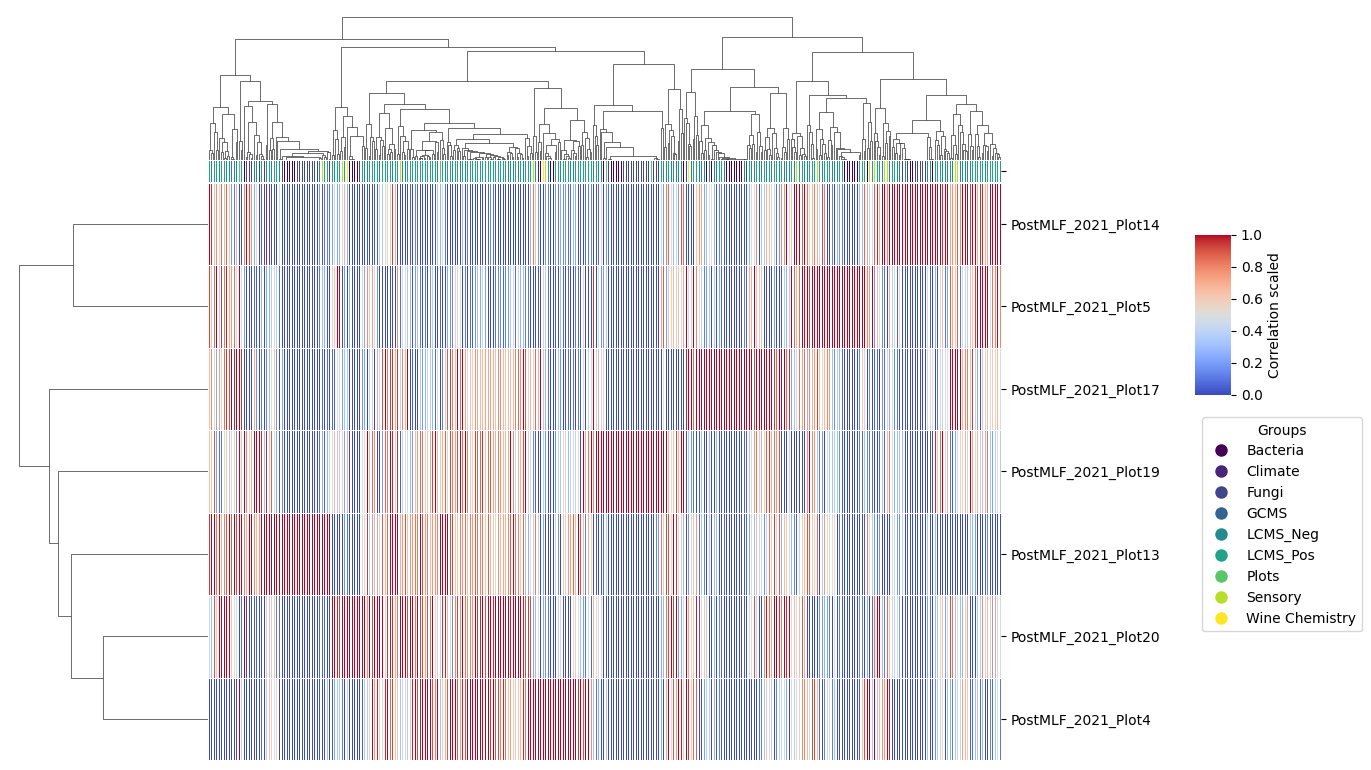

In [43]:
# Ensure col_colors is a Series with the same column names as your clustermap_df_var
col_colors = pd.Series(col_colors, index=clustermap_df_var.columns)

# Plot with sns.clustermap
g = sns.clustermap(clustermap_df_var, metric="correlation", row_cluster=True, col_cluster=True, 
                   col_colors=col_colors, cmap="coolwarm", linewidths=0.5, figsize=(12, 8),
                   standard_scale=1,
                   xticklabels=False,  
                   cbar_pos=(1, .5, .03, .2))

# Set labels and title using the clustermap object
g.ax_heatmap.set_xlabel("")
g.ax_heatmap.set_ylabel("")
g.ax_heatmap.set_title("")

# Optionally, adjust color bar or any other settings via the returned axes
g.cax.set_ylabel("Correlation scaled")  # If you'd like to remove colorbar label

# Adjust the column label size
for label in g.ax_col_dendrogram.get_xticklabels():
    label.set_fontsize(10)  # Set column label font size smaller
for label in g.ax_row_dendrogram.get_yticklabels():
    label.set_fontsize(10)  # Set row label font size smaller

# Create legends for col_colors with group names instead of hex codes
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in group_colors.values()]  # Use the colors from group_colors
labels = list(group_colors.keys())  # Use the group names for the legend labels


# Place the legends outside the plot and stack them vertically
plt.legend(handles=handles, labels=labels, title="Groups", bbox_to_anchor=(0, -0.1), loc='upper left', ncol=1)

# Show the plot
plt.show()

In [44]:
# Compute correlation matrix
corr_matrix = clustermap_df_var.corr(method='spearman')

# Ensure both index and columns are MultiIndex
corr_matrix.index = pd.MultiIndex.from_tuples(corr_matrix.index)
corr_matrix.columns = pd.MultiIndex.from_tuples(corr_matrix.columns)
# Convert the MultiIndex to DataFrame for easier handling
corr_df = corr_matrix.stack().reset_index()

# ok now we need to further flatten this df! 
# Define the columns to check
columns_to_check = ['LCMS_Pos', 'LCMS_Neg', 'Wine Chemistry', 'Plots', 'Climate', 'Fungi', 'Bacteria', 'Sensory']
# Create 'group 2' column
# Create 'group 2' and 'correlation' columns
corr_df['group 2'] = corr_df[columns_to_check].notna().apply(lambda row: ', '.join(row.index[row]), axis=1)
corr_df['correlation'] = corr_df[columns_to_check].apply(lambda row: ', '.join(map(str, row.dropna().values)), axis=1)
corr_df.drop(columns=columns_to_check, inplace=True)

corr_df.rename(columns={'level_0':'group 1', 'level_1':'variable 1', 'level_2':'variable 2'}, inplace=True)

# Convert the 'Correlation' column to numeric (in case of string issues)
corr_df['correlation'] = pd.to_numeric(corr_df['correlation'], errors='coerce')

# Remove self-correlations
corr_df = corr_df[(corr_df["variable 1"] != corr_df["variable 2"]) | (corr_df["group 1"] != corr_df["group 2"])]

# get absolute correlation value 
corr_df['correlation_abs'] = corr_df['correlation'].abs()

corr_df_sorted = corr_df.sort_values(by="correlation_abs", ascending=False).reset_index(drop=True)

# save 
corr_df_sorted.to_csv('SensoryMicrobiomeMetabolome/Spearman_all_Correlations.csv')

corr_df_sorted.head()

/scratch/lfloerl/tmpdata/ipykernel_3109984/4155738555.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  corr_df = corr_matrix.stack().reset_index()


,group 1,variable 1,variable 2,group 2,correlation,correlation_abs
0,Fungi,Phaeococcomyces,Dothideomycetes,Fungi,1.0,1.0
1,Fungi,Phaeococcomyces,Devriesia_fraserae,Fungi,1.0,1.0
2,Bacteria,s__Rhodococcus_hoagii,o__Planctomycetales,Bacteria,1.0,1.0
3,Fungi,Phaeococcomyces,Alternaria_eureka,Fungi,1.0,1.0
4,Fungi,Phaeococcomyces,Alternaria_chlamydospora,Fungi,1.0,1.0


#### Investigate certain subsets 

In [195]:
corr_df_sorted_plots = corr_df_sorted[
    (corr_df_sorted['group 1'] == 'Plots') & 
    (corr_df_sorted['correlation_abs'] > 0.6)]

corr_df_sorted_plots.to_csv('SensoryMicrobiomeMetabolome/PostMLF21_Plot_Correlations.csv')

corr_df_sorted_plots

,group 1,variable 1,variable 2,group 2,correlation,correlation_abs
41,Plots,Geology_Gravel_moraine,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__D...,Fungi,1.000000,1.000000
47,Plots,Geology_Gravel_moraine,k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Ph...,Fungi,1.000000,1.000000
54,Plots,Geology_Gravel_moraine,k__Fungi;p__Ascomycota;c__Sordariomycetes;o__S...,Fungi,1.000000,1.000000
414,Plots,Geology_Gravel_moraine,d__Bacteria; p__Chloroflexi; c__KD4-96; o__KD4...,Bacteria,1.000000,1.000000
425,Plots,Geology_Gravel_moraine,d__Bacteria; p__Acidobacteriota; c__Vicinamiba...,Bacteria,1.000000,1.000000
...,...,...,...,...,...,...
39533,Plots,Average_slope,Corchorifatty acid F.1,LCMS_Neg,0.605550,0.605550
39628,Plots,Average_radiation,Spermidine,LCMS_Pos,0.604833,0.604833
39698,Plots,Exposition_South-West,L-(-)-Methionine.1,LCMS_Pos,0.604215,0.604215
40039,Plots,Average_radiation,Ile-Ser,LCMS_Pos,0.601569,0.601569


In [198]:
corr_df_sorted_Sensory = corr_df_sorted[
    (corr_df_sorted['group 1'] == 'Sensory') & 
    (corr_df_sorted['correlation_abs'] > 0.6)]

corr_df_sorted_Sensory.to_csv('SensoryMicrobiomeMetabolome/PostMLF21_Sensory_Correlations.csv')

corr_df_sorted_Sensory

,group 1,variable 1,variable 2,group 2,correlation,correlation_abs
1393,Sensory,Sweetness,NP-016371,LCMS_Neg,1.000000,1.000000
1645,Sensory,Acidity,Metalaxyl,LCMS_Pos,0.964286,0.964286
1659,Sensory,Oxidation,UDP-N-acetylglucosamine,LCMS_Neg,0.964286,0.964286
1690,Sensory,Volume_in_the_mouth,Metalaxyl,LCMS_Pos,0.964286,0.964286
1691,Sensory,Reduction,Suberic acid,LCMS_Neg,0.964286,0.964286
...,...,...,...,...,...,...
48806,Sensory,Honey,Mevalonic acid.2,LCMS_Neg,-0.607143,0.607143
48807,Sensory,Honey,Milk,Sensory,-0.607143,0.607143
48846,Sensory,Acidity,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,Bacteria,-0.605734,0.605734
48871,Sensory,CO2,1-Palmitoyl-sn-glycero-3-phosphocholine,LCMS_Pos,0.600099,0.600099
